In [1]:
import numpy as np
import pandas as pd
import csv
import math
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.integrate import quad
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy.signal import find_peaks


In [2]:
#format plot


plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rc('text', usetex=True)
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


count_figure=0
%matplotlib inline 

1090/results/initial_precipitation_distribution_1090C_strain_rate0.000E+00.txt
(250,)
(250,)
1110/results/initial_precipitation_distribution_1110C_strain_rate0.000E+00.txt
(250,)
(250,)


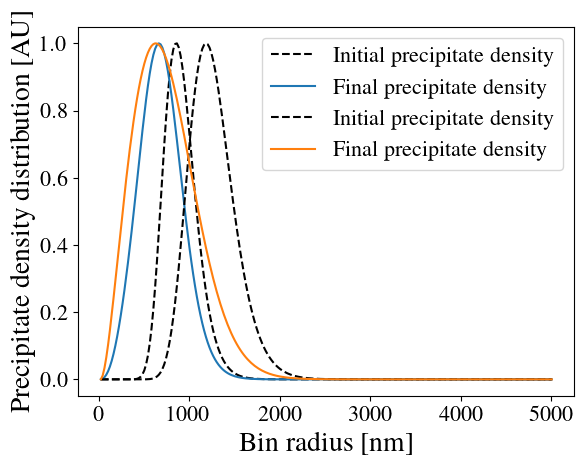

In [3]:
#chose the strain rates and temperatures for which to display the result 
strain_rate=[0]
temperature_max=[1090,1110]
j=0
#prefix for folder where the results are stored


initial_precipitate_distribution=[]
leg=[]

suffix=[]
prefix=[]
for i  in range(len(temperature_max)):
        #the suffix of the result files depends on the temperature and strain rate considered
    prefix.append('{temp}/results/'.format(temp=temperature_max[i]))
    suffix.append("{temperature}C_strain_rate{str:3.3E}.txt".format(temperature=temperature_max[i], str=strain_rate[j]))
#print(suffix)


for i  in range(len(temperature_max)):
     
        
        #load and display the initial precipitate distribution
        file_name= "{pre}initial_precipitation_distribution_{suffix}".format(pre=prefix[i],suffix=suffix[i])
        print(file_name)
        data_0=np.genfromtxt(file_name, skip_header=1)
        radius_bin=data_0[:,0]
        print(radius_bin.shape)
        precipitate_density_0=data_0[:,1]
        print(precipitate_density_0.shape)
        f=plt.plot(radius_bin*1e9, precipitate_density_0/max(precipitate_density_0),'--', color='k', label='Initial precipitate density' )
        leg.append("{temperature}°C".format(temperature=temperature_max[i]))
        #load and display the final precipitate distribution
        file_name= "{pre}precipitation_distribution_{suffix}".format(pre=prefix[i],suffix=suffix[i])
        data_0=np.genfromtxt(file_name, skip_header=1)
        final_precipitate_density=data_0
        count_figure=count_figure+1
        plt.plot(radius_bin*1e9, final_precipitate_density/max(final_precipitate_density), label='Final precipitate density')
        leg.append("{temperature}°C".format(temperature=temperature_max[i]))
        plt.legend()
        plt.xlabel('Bin radius [nm]')
        plt.ylabel('Precipitate density distribution [AU]')
        
                #load 'apparent precipitate distribution depending on limit of detectability

        
    


In [4]:
time=[]
mean_radius=[]
precipitate_density=[]
vf=[]
nucleation_rate=[]
critical_radius=[]
concentration_matrix=[]
growth_rate=[]



for i  in range(len(temperature_max)):
    
       # print(j)
        file_name= "{pre}kinetics_data_{suffix}".format(pre=prefix[i],suffix=suffix[i])
        
       # print(file_name)
        data=[]
        data=np.genfromtxt(file_name, skip_header=4)
        time.append(data[:,0])
        mean_radius.append(data[:,1]) #nm 
        
        precipitate_density.append(data[:,2]) #/micron^3
        vf.append(data[:,3]) #
        nucleation_rate.append(data[:,5]) #per micron^3
        critical_radius.append(data[:,4]) #nm
        concentration_matrix.append(data[:,6]) #
        growth_rate.append(np.diff(data[:,1])/np.diff(data[:,0]))
        #print(concentration_matrix)

       # print(time)

[1.00000000e-03 1.69674000e-01 3.38347000e-01 ... 1.49997798e+04
 1.49999217e+04 1.50000636e+04] [899.999809 899.967671 899.935536 ... 680.81143  680.81157  680.811711]
[1.00000000e-03 1.50828000e-01 2.25739000e-01 ... 1.49998443e+04
 1.49999010e+04 1.50000144e+04] [1249.999437 1249.915084 1249.872913 ...  741.880612  741.88072
  741.880938]


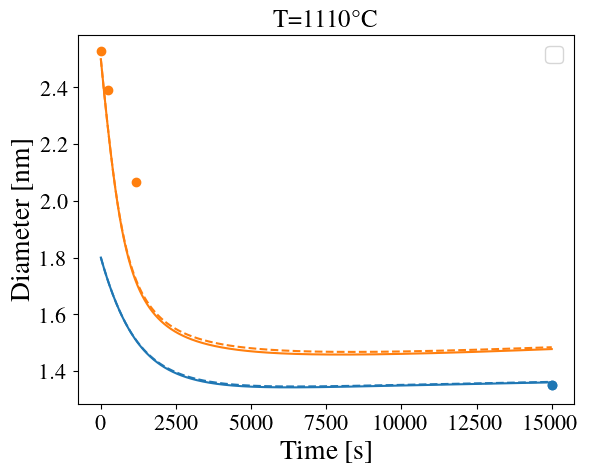

In [5]:
j=0 #without deformation
leg=[]
f_radius=[]

for i  in range(len(temperature_max)):
        file_name= "{pre}apparent_precipitates_{suffix}".format(pre=prefix[i],suffix=suffix[i])
        data=np.genfromtxt(file_name, skip_header=0)
        time_apparent=data[:,0]
        radius_apparent=data[:,1]
        vf_apparent=data[:,2]
        N_apparent=data[:,3]
        
        file_name= "experimental/time_diameter_{suffix}.txt".format(suffix=temperature_max[i])
        data=np.genfromtxt(file_name)
        f1=plt.plot(data[:,0],data[:,1],'o')
        colour=f1[0].get_color()

        
        #for j in [3]:
        f1=plt.plot(time[len(temperature_max)*j+i], 2*mean_radius[len(temperature_max)*j+i]/1000, color=colour)
        f1=plt.plot(time_apparent, 2*radius_apparent/1000, '--',  color=colour)
        print(time_apparent, radius_apparent)
        colour=f1[0].get_color()
      #  f1=plt.semilogx(time[len(temperature_max)*j+i], critical_radius[len(temperature_max)*j+i], '--k')
        
            #f1=plt.plot(time[len(temperature_max)*j+i], mean_radius[len(temperature_max)*j+i]*np.sqrt(3/5), '--', color=colour)
             #print(max(mean_radius[3*j+i])-min(mean_radius[3*j+i]))
        plt.legend(leg)  
        plt.title('T={temperature}°C'.format(temperature=temperature_max[i]), fontsize=18 )
       # plt.xlim([0,(temperature_max[i]-20)/heating_rate+30])
        
        f_radius.append(interpolate.interp1d(time[len(temperature_max)*j+i],mean_radius[len(temperature_max)*j+i]))
       # plt.ylim([1.12,1.2])
    #f2=plt.plot(time[0], critical_radius[0],'--k')
#plt.figure(1)
plt.xlabel('Time [s]')
plt.ylabel('Diameter [nm]')
#plt.legend(['Mean radius', 'r*'])
#plt.xlim([10**0, 10**4.5])

#plt.legend(leg)
plt.draw
plt.show
plt.savefig('fig_time_radius_{s}_{t}.pdf'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')
plt.savefig('fig_time_radius_{s}_{t}.jpeg'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')
     

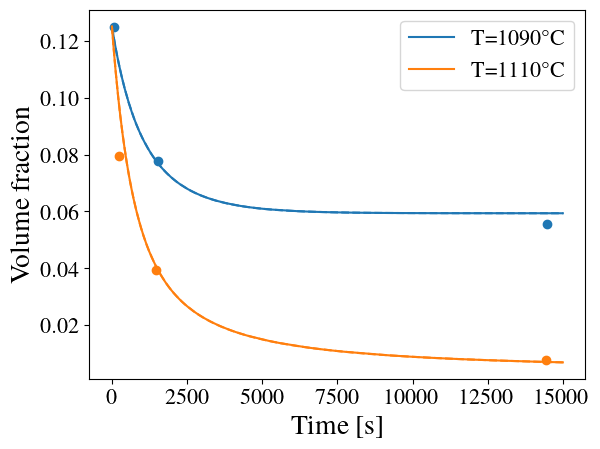

In [6]:
j=0 #without deformation
leg=[]

for i  in range(len(temperature_max)):        
        file_name= "{pre}apparent_precipitates_{suffix}".format(pre=prefix[i],suffix=suffix[i])
        data=np.genfromtxt(file_name, skip_header=0)
        time_apparent=data[:,0]
        radius_apparent=data[:,1]
        vf_apparent=data[:,2]
        N_apparent=data[:,3]
        
        file_name= "experimental/time_vf_{suffix}.txt".format(suffix=temperature_max[i])
        data=np.genfromtxt(file_name)
        f1=plt.plot(data[:,0],data[:,1]/100,'o')
        colour=f1[0].get_color()
        #plt.figure(i)
        plt.xlabel('Time [s]')
        plt.ylabel('Volume fraction')        
        #for j in [3]:
        f1=plt.plot(time[len(temperature_max)*j+i], vf[len(temperature_max)*j+i], color=colour, label='T={temperature}°C'.format(temperature=temperature_max[i]))
        plt.plot(time_apparent,vf_apparent,'--', color=colour)
        #plt.legend(leg)  
       
        #plt.xlim([1,10000])
plt.legend()
plt.savefig('fig_vf_{s}_{t}.pdf'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')
plt.savefig('fig_vf_{s}_{t}.jpeg'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')

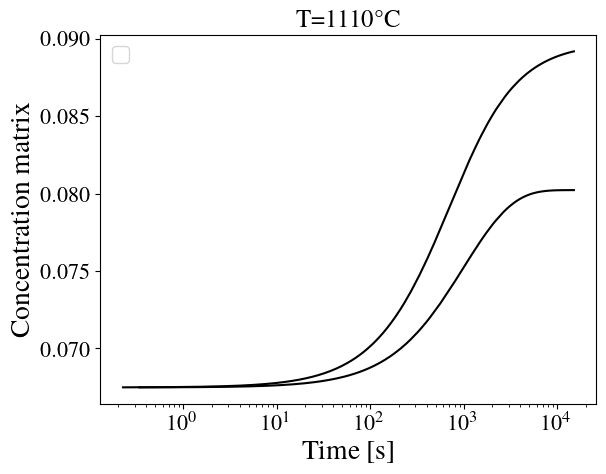

In [7]:
j=0 #without deformation
leg=[]
    
for i  in range(len(temperature_max)):        
        #plt.figure(i)
        plt.xlabel('Time [s]')
        plt.ylabel('Concentration matrix')
        #for j in [3]:
        f1=plt.semilogx(time[len(temperature_max)*j+i], concentration_matrix[len(temperature_max)*j+i], 'k')
        colour=f1[0].get_color()
        plt.legend(leg)  
        plt.title('T={temperature}°C'.format(temperature=temperature_max[i]), fontsize=18 )
        #plt.xlim([1,1000])
plt.savefig('fig_time_concentration_{s}_{t}.pdf'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')
          

3.0498299999999997e-18


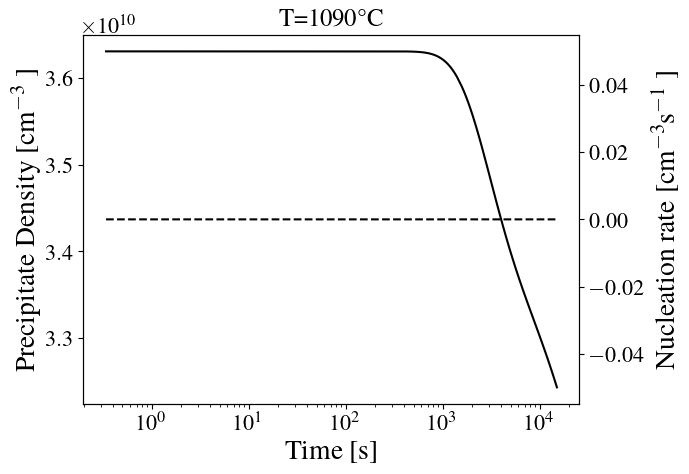

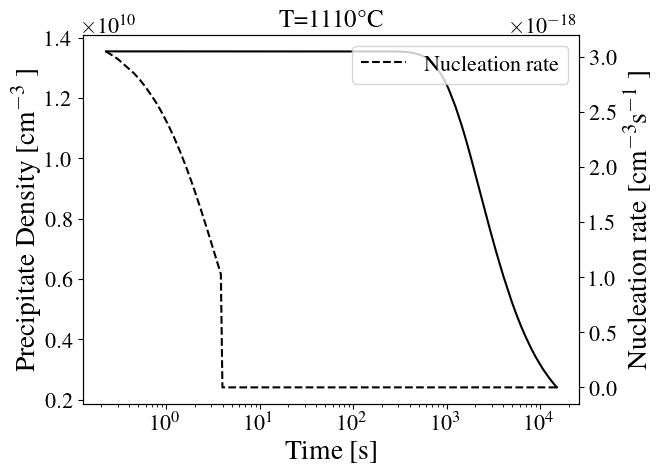

In [8]:

j=0 #without deformation
leg=[]

for i  in range(len(temperature_max)):        
        fig,ax = plt.subplots()
        plt.xlabel('Time [s]')
        plt.ylabel('Precipitate Density [cm$^{-3}$ ]')        
        #for j in [3]:
        plt.semilogx(time[len(temperature_max)*j+i], precipitate_density[len(temperature_max)*j+i]*10**12, 'k', label='Number density')
        colour=f1[0].get_color()
       
        plt.title('T={temperature}°C'.format(temperature=temperature_max[i]), fontsize=18 )
        ax2=ax.twinx()
        ax2.semilogx(time[len(temperature_max)*j+i], nucleation_rate[len(temperature_max)*j+i]*10**12, '--k',label='Nucleation rate')
        plt.ylabel('Nucleation rate [cm$^{-3}$s$^{-1}$ ]')
#plt.xlim([10**0.5, 10**4.5])   
plt.legend()
print(max(nucleation_rate[len(temperature_max)*j+i]*10**12))
plt.savefig('fig_time_precipitate_density_nucleation_{s}_{t}.pdf'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')
    